In [1]:
import pip
pip.main(['install', 'imutils'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

# Import Libraries

In [2]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

# Cover Image

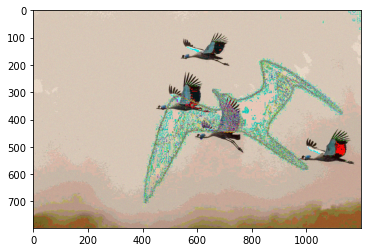

In [21]:
# read the Image
c_Image = cv2.imread("rec_hideImage.png")
plt.imshow(c_Image)



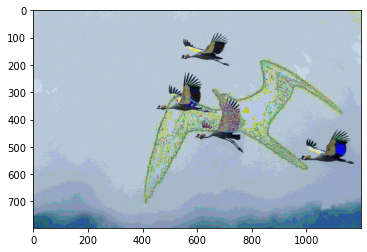

In [22]:
# convert to RGB
col_image = cv2.cvtColor(c_Image, cv2.COLOR_BGR2RGB)
plt.imshow(col_image)

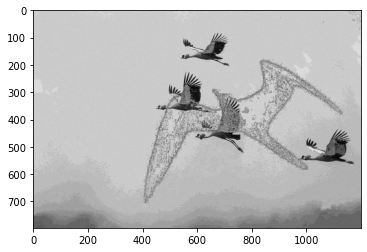

In [23]:
# convert to grayscale
c_gray = cv2.cvtColor(c_Image, cv2.COLOR_RGB2GRAY)
plt.imshow(c_gray,cmap = 'gray')

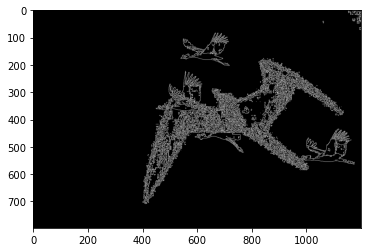

In [24]:
#Canny Edge Detection Algorithm
c_canny = cv2.Canny(c_gray,120, 255, 9)
plt.imshow(c_canny, cmap='gray')

In [25]:
kernel = np.ones((3,3),np.uint8)

In [26]:
c_dilated = cv2.dilate(c_canny, kernel, iterations=2)

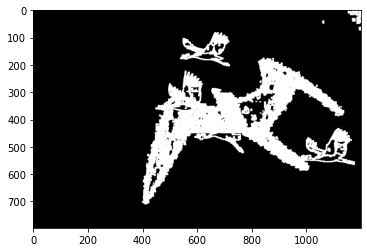

In [27]:
plt.imshow(c_dilated, cmap='gray')

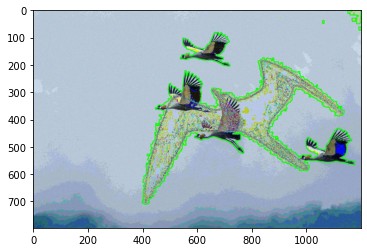

In [28]:
(cnt, heirarchy) = cv2.findContours(c_dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(c_Image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)
plt.imshow(rgb)

In [29]:
print("No. of Objets", len(cnt))

No. of Objets 9


# Hide Image

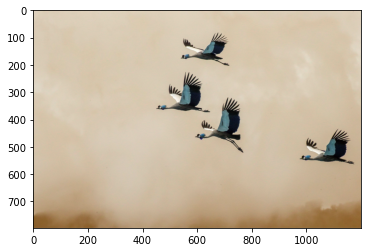

In [35]:
# read the Image to Hide
h_Image = cv2.imread("test2.png")
plt.imshow(h_Image)

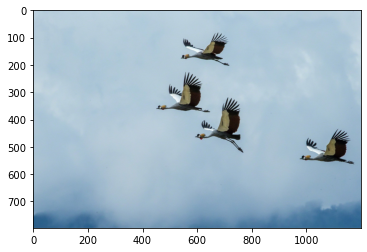

In [36]:
# convert to RGB
col_h_image = cv2.cvtColor(h_Image, cv2.COLOR_BGR2RGB)
plt.imshow(col_h_image)

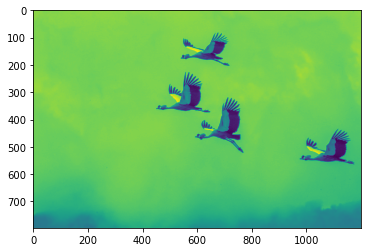

In [37]:
# convert to grayscale
h_gray = cv2.cvtColor(h_Image, cv2.COLOR_RGB2GRAY)
plt.imshow(h_gray)

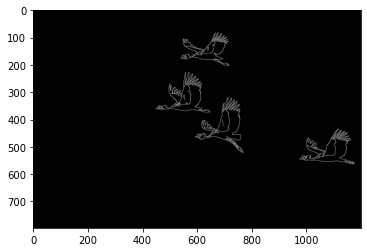

In [38]:
#Canny Edge Detection Algorithm
h_canny = cv2.Canny(h_gray,120, 255, 9)
plt.imshow(h_canny, cmap='gray')

In [39]:
kernel = np.ones((3,3),np.uint8)

In [40]:
h_dilated = cv2.dilate(h_canny, kernel, iterations=2)

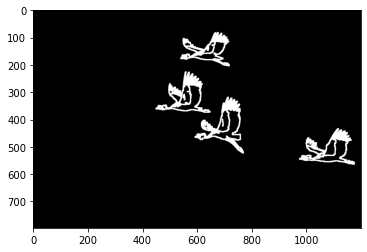

In [41]:
plt.imshow(h_dilated, cmap='gray')

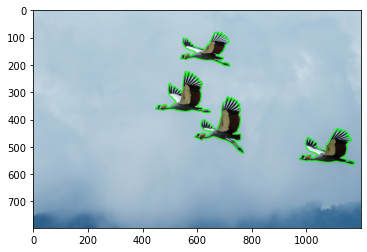

In [42]:
(cnt, heirarchy) = cv2.findContours(h_dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(h_Image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)
plt.imshow(rgb)

In [43]:
print("No. of Objets in Hide Image", len(cnt))

No. of Objets in Hide Image 4


# Stegnography

In [44]:
import random


In [45]:
# c_Image and h_Image are the
    # two input images

      
for i in range(h_Image.shape[0]):
        for j in range(h_Image.shape[1]):
            for k in range(3):
                  
                # val1 and val2 are 8-bit pixel values
                # of c_Image and h_Image respectively
                val1 = format(c_Image[i][j][k], '08b')
                val2 = format(h_Image[i][j][k], '08b')
                  
                # Taking 4 MSBs of each image
                val3 = val1[:4] + val2[:4] 
                  
                c_Image[i][j][l]= int(val3, 2)
                  
cv2.imwrite('steganographedImage.jpg', c_Image)

True

In [46]:
# Revovering TWo images from the Encrypted image
img = cv2.imread('steganographedImage.jpg') 
width = img.shape[0]
height = img.shape[1]
      
    # img3 and img4 are two blank images
img3 = np.zeros((width, height, 3), np.uint8)
img4 = np.zeros((width, height, 3), np.uint8)
      
for i in range(width):
    for j in range(height):
         for l in range(3):
                val1 = format(img[i][j][l], '08b')
                val2 = v1[:4] + chr(random.randint(0, 1)+48) * 4
                val3 = v1[4:] + chr(random.randint(0, 1)+48) * 4
                  
                # Appending data to img1 and img2
                img3[i][j][l]= int(val2, 2)
                img4[i][j][l]= int(val3, 2)
      
    # These are two images produced from
    # the encrypted image
cv2.imwrite('rec_coverImage.png', img3)
cv2.imwrite('rec_hideImage.png', img4)

True